In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/My Drive/COMP_551_Machine_Learning/Miniproject1'

Mounted at /content/drive


In [ ]:
## Imports

import numpy as np
import pandas as pd 
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm
import scipy.stats
import seaborn as sb
import random

### Task 1: Acquire, preprocess, and analyze the data

1. Load the datasets into NumPy or Pandas objects in Python. 

2. Clean the data. Are there any missing or malformed features? Are there are other data oddities that need to be dealt with? You should remove any examples with missing or malformed features and note this in your report.

3. Compute basic statistics on the data to understand it better. E.g., what are the distributions of the positive vs. negative classes, what are the distributions of some of the numerical features?



##[Dataset 1](https://archive.ics.uci.edu/ml/datasets/Energy+efficiency) 

* We should remove highly correlated features
* Make correlation matrix, find variance between features, determine [feature dependance](https://towardsdatascience.com/every-statistical-test-to-check-feature-dependence-773a21cd6722) etc.

* Link to [research paper](https://tarjomefa.com/wp-content/uploads/2017/04/6453-English-TarjomeFa.pdf)






##Check for Missing Values

For each feature and label, there are 0 missing values. 

In [ ]:
## Dataset 1

data1_path = path + '/Dataset1_Energy_Efficiency/ENB2012_data.xlsx'
d1_x_types = ['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution']
d1_x_val = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']

d1_labels = ['Heating Load', 'Cooling Load']
d1_y_val = ['Y1', 'Y2']
df = pd.read_excel(data1_path)


print("Number of Missing Features")
print(df.isna().sum())

summary = df.describe()
print(summary)

unique = df.nunique()
print("\nNumber of unique values for each column:")
print(unique)


for i in range(0,8):
  print("\nNumber of Occurances in Feature X" + str(i) + " -- " + d1_x_types[i])
  print(df['X' + str(i+1)].value_counts())




Number of Missing Features
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64
               X1          X2          X3          X4         X5          X6  \
count  768.000000  768.000000  768.000000  768.000000  768.00000  768.000000   
mean     0.764167  671.708333  318.500000  176.604167    5.25000    3.500000   
std      0.105777   88.086116   43.626481   45.165950    1.75114    1.118763   
min      0.620000  514.500000  245.000000  110.250000    3.50000    2.000000   
25%      0.682500  606.375000  294.000000  140.875000    3.50000    2.750000   
50%      0.750000  673.750000  318.500000  183.750000    5.25000    3.500000   
75%      0.830000  741.125000  343.000000  220.500000    7.00000    4.250000   
max      0.980000  808.500000  416.500000  220.500000    7.00000    5.000000   

               X7         X8          Y1          Y2  
count  768.000000  768.00000  768.000000  768.000000  
mean     0.234375    2.81250   22.307195   24.587

In [ ]:
dataset1_array = np.asarray(df)

dataset1_x = dataset1_array[:,:8]   ## Dataset 1 (design matrix)
dataset1_y = dataset1_array[::,8:]  ## Dataset 1 output

d1x_max = np.max(dataset1_x[:, :], axis=0)
d1y_max = np.max(dataset1_y[:, :], axis=0)
d1x_norm = dataset1_x / d1x_max
d1y_norm = dataset1_y / d1y_max

In [ ]:
class Probability:
    def __init__(self, value, probability):
        self.value = value   
        self.probability = probability

class Stats:

    def __init__(self, array):
        self.std = np.std(array)   
        self.var = np.var(array)
        self.mean = np.mean(array)
  

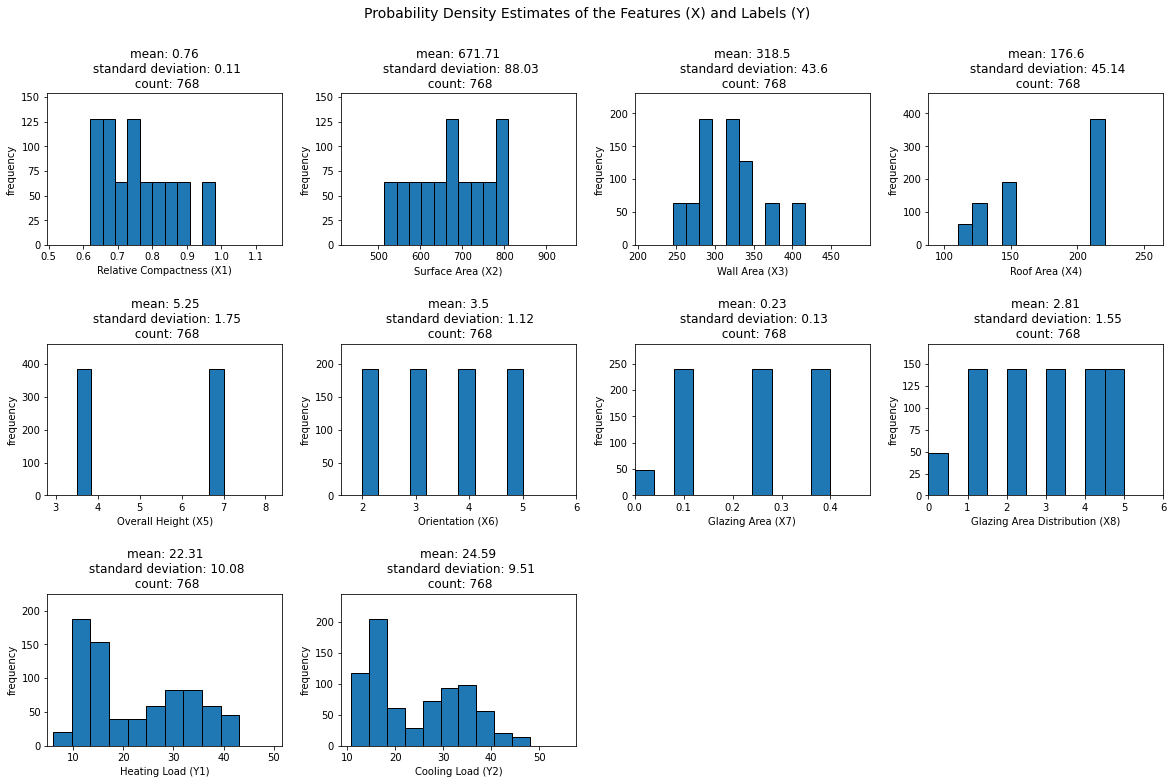

In [ ]:
fig, axes = plt.subplots(ncols=4, nrows=3, sharex=False, sharey=False, figsize=(20, 12))
x = 0
y = 0

x1_features_distribution = []
x1_stats = []

fig.suptitle('Probability Density Estimates of the Features (X) and Labels (Y)', y=0.98, fontsize=14)
for i in range(0,10):
    x=int(i/4)
    y=i%4

    if (i < 8):
      x1_stats.append(Stats(dataset1_x[:, i]))
      counts, bins = np.histogram(dataset1_x[:, i])
      axes[x][y].hist(bins[:-1], bins, weights=counts, edgecolor = "black")

      axes[x][y].set_title("mean: " + str(round(x1_stats[i].mean, 2)) + "\n standard deviation: " + str(round(x1_stats[i].std, 2)) + "\n count: " + str(np.shape(dataset1_x[:, i])[0]))
      axes[x][y].set(xlabel=d1_x_types[i] + " (" + d1_x_val[i] + ")", ylabel='frequency')
    
    else:
      x1_stats.append(Stats(dataset1_y[:, i - 8]))
      counts, bins = np.histogram(dataset1_y[:, i - 8])
      axes[x][y].hist(bins[:-1], bins, weights=counts, edgecolor = "black")
      axes[x][y].set_title("mean: " + str(round(x1_stats[i].mean, 2)) + "\n standard deviation: " + str(round(x1_stats[i].std, 2)) + "\n count: " + str(np.shape(dataset1_y[:, i - 8])[0]))
      axes[x][y].set(xlabel=d1_labels[i - 8] + " (" + d1_y_val[i - 8] + ")", ylabel='frequency')
    

    axes[x][y].set_xlim([np.min(bins)*0.8, np.max(bins)*1.2])
    axes[x][y].set_ylim([0, np.max(counts)*1.2])

plt.subplots_adjust(wspace=0.25, hspace=0.65)
axes[2,2].set_visible(False)
axes[2,3].set_visible(False)
plt.show()

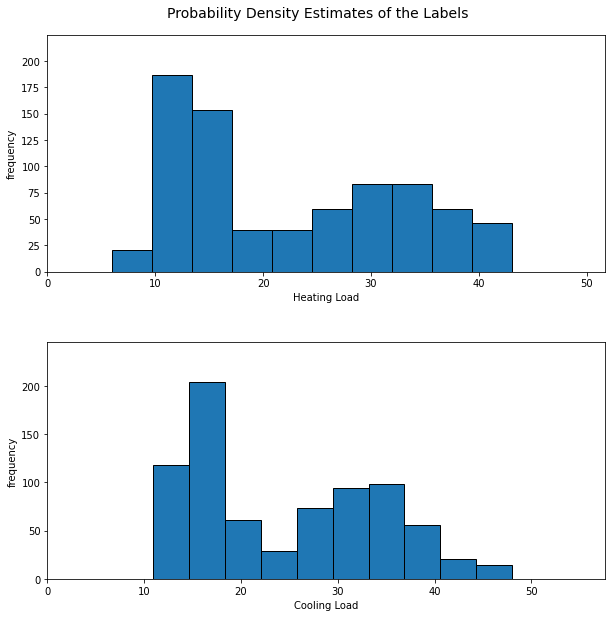

In [ ]:
fig, axes = plt.subplots(2, sharex=False, sharey=False, figsize=(10, 10))

fig.suptitle('Probability Density Estimates of the Labels', y=0.92, fontsize=14)
for i in range(0,2):
    counts, bins = np.histogram(dataset1_y[:, i])
    axes[i].hist(bins[:-1], bins, weights=counts, edgecolor = "black")
    axes[i].set_xlim([0, np.max(bins)*1.2])
    axes[i].set_ylim([0, np.max(counts)*1.2])
    axes[i].set(xlabel=d1_labels[i], ylabel='frequency')


plt.subplots_adjust(wspace=0.1, hspace=0.3)
plt.show()

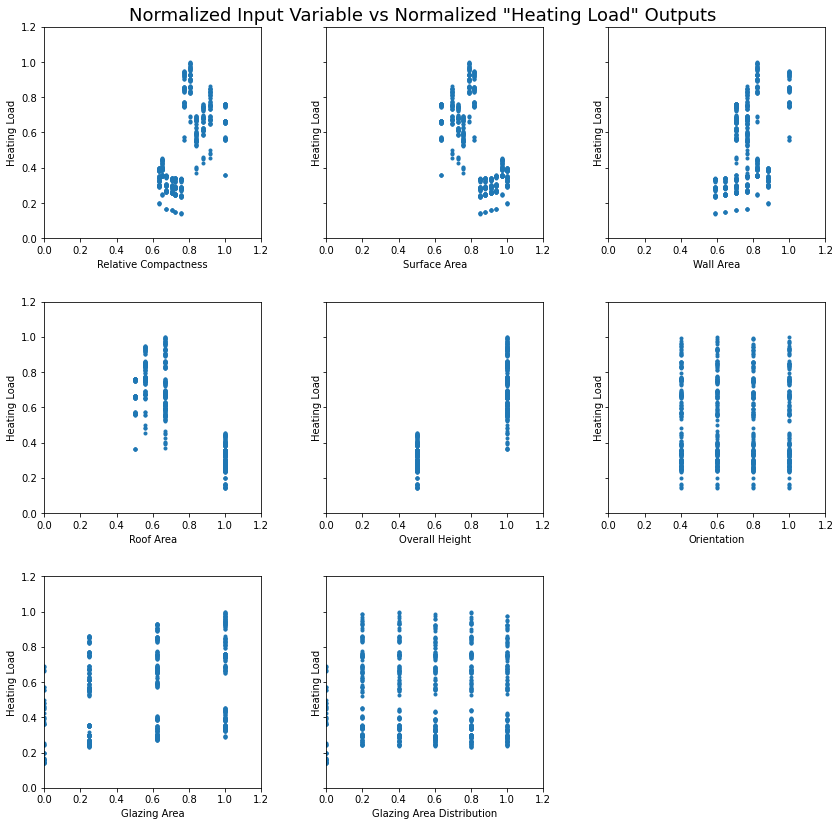

In [ ]:
x = 0
y = 0

fig, axes = plt.subplots(ncols=3, nrows=3, sharex=False, sharey=True, figsize=(14, 14))

fig.suptitle('Normalized Input Variable vs Normalized "Heating Load" Outputs', y=0.9, fontsize=18)
for i in range(0,8):
    x=int(i/3)
    y=i%3

    axes[x][y].plot(d1x_norm[:, i], d1y_norm[:, 0], '.')
    axes[x][y].set_xlim([0, 1.2])
    axes[x][y].set_ylim([0, 1.2])
    axes[x][y].set(xlabel=(d1_x_types[i]), ylabel=(d1_labels[0]))


plt.subplots_adjust(wspace=0.3, hspace=0.3)
fig.delaxes(axes[2][2])
plt.show()


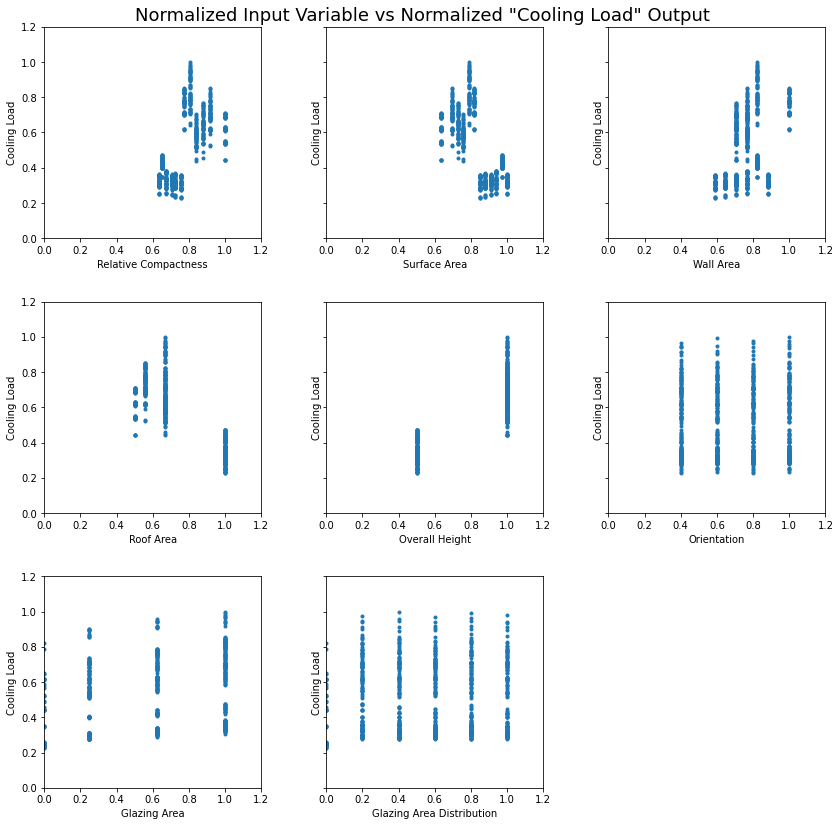

In [ ]:
x = 0
y = 0

fig, axes = plt.subplots(ncols=3, nrows=3, sharex=False, sharey=True, figsize=(14, 14))

fig.suptitle('Normalized Input Variable vs Normalized "Cooling Load" Output', y=0.9, fontsize=18)
for i in range(0,8):
    x=int(i/3)
    y=i%3

    axes[x][y].plot(d1x_norm[:, i], d1y_norm[:, 1], '.')
    axes[x][y].set_xlim([0, 1.2])
    axes[x][y].set_ylim([0, 1.2])
    axes[x][y].set(xlabel=(d1_x_types[i]), ylabel=(d1_labels[1]))


plt.subplots_adjust(wspace=0.3, hspace=0.3)
fig.delaxes(axes[2][2])
plt.show()

In [ ]:
# fig, axes = plt.subplots(ncols=10, nrows=10, sharex=True, sharey=True, figsize=(5, 5))
# fig.suptitle('Pair Plot of Normalized Features', y=0.95, fontsize=18)


# labels_for_df1 = d1_x_val + d1_y_val
# for i in range(0,10):
#   for j in range(0,10):
#     axes[i][j].plot(df.iloc[:, i].values, df.iloc[:, j].values, '.')
#     axes[i][j].set(xlabel=labels_for_df1[j], ylabel=labels_for_df1[i])

# for ax in axes.flat:
#     ax.label_outer()
#     ax.set_xticks([])
#     ax.set_yticks([])

# plt.subplots_adjust(wspace=0, hspace=0)
# plt.show()


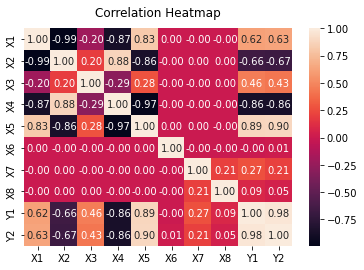

In [ ]:
heatmap = sb.heatmap(df.corr(), annot=True, fmt=".2f")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()

## [Dataset 2](https://archive.ics.uci.edu/ml/datasets/Qualitative_Bankruptcy)

Attribute Information: (P = Positive, A - Average, N - negative, B - Bankruptcy, NB - Non-Bankruptcy) 

1. Industrial Risk: {P,A,N} 
2. Management Risk: {P,A,N} 
3. Financial Flexibility: {P,A,N} 
4. Credibility: {P,A,N} 
5. Competitiveness: {P,A,N} 
6. Operating Risk: {P,A,N} 
7. Class: {B,NB}

Class Distribution (from dataset contributor): [143 instances For Non-Bankruptcy] [107 instances For Bankruptcy]

Number of Missing Features
Industrial Risk          0
Management Risk          0
Financial Flexibility    0
Credibility              0
Competitiveness          0
Operating Risk           0
Class                    0
dtype: int64

Number of Positives per Attribute
Industrial Risk          80
Management Risk          62
Financial Flexibility    57
Credibility              79
Competitiveness          91
Operating Risk           79
Class                     0
dtype: int64

Number of Averages per Attribute
Industrial Risk          81
Management Risk          69
Financial Flexibility    74
Credibility              77
Competitiveness          56
Operating Risk           57
Class                     0
dtype: int64

Number of Negatives per Attribute
Industrial Risk           89
Management Risk          119
Financial Flexibility    119
Credibility               94
Competitiveness          103
Operating Risk           114
Class                      0
dtype: int64

Total Datapoints
250

Number of 

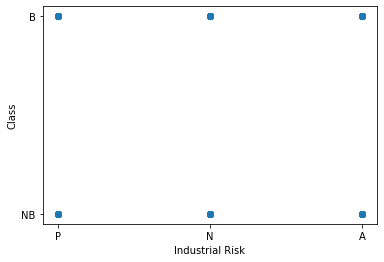

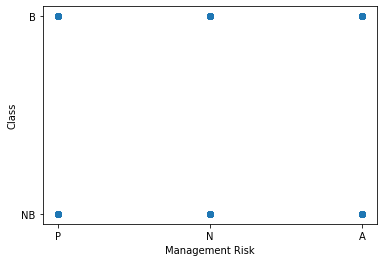

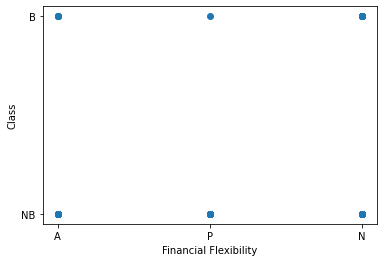

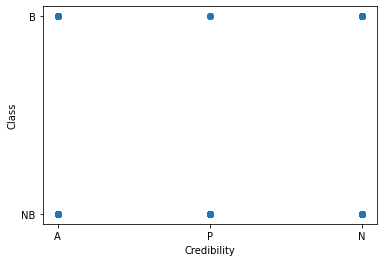

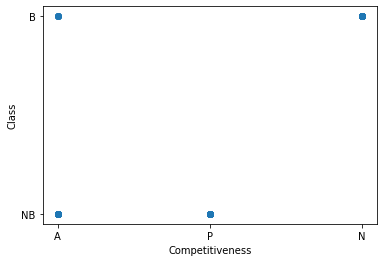

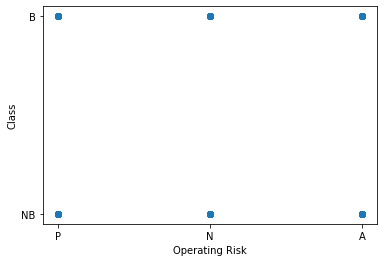

In [ ]:
# Dataset 2
data2_path = path + '/Dataset2_Qualitative_Bankruptcy/Qualitative_Bankruptcy_data.txt'
d2_x_types = ['Industrial Risk', 'Management Risk', 'Financial Flexibility', 'Credibility', 'Competitiveness', 'Operating Risk', 'Class']
df2 = pd.read_csv(data2_path, names=d2_x_types)
dataset2_array = np.asarray(df2)

print("Number of Missing Features")
print(df2.isna().sum())

print("\nNumber of Positives per Attribute")
print(df2.eq("P").sum())

print("\nNumber of Averages per Attribute")
print(df2.eq("A").sum())

print("\nNumber of Negatives per Attribute")
print(df2.eq("N").sum())

print("\nTotal Datapoints")
print(df2.shape[0])

print("\nNumber of Total Non-Bankruptcies")
num_non_bankruptcies = df2['Class'].eq("NB").sum()
print(num_non_bankruptcies)

print("\nNumber of Total Bankruptcies")
num_bankruptcies = df2['Class'].eq("B").sum()
print(num_bankruptcies)

print("\n" + str(num_bankruptcies/(num_bankruptcies + num_non_bankruptcies) * 100) + "% of the datapoints are bankruptcies")


for i in range(6):
  plt.scatter(df2.iloc[:,i].values, df2.iloc[:,-1].values)
  plt.xlabel(d2_x_types[i])
  plt.ylabel(d2_x_types[-1])
  plt.show()

In [ ]:
# Plot Bankruptcy/Non-Bankruptcy vs Positive, Negative, Average for each 

P = np.empty(0)
A = np.empty(0)
N = np.empty(0)
P_NB = np.empty(0)
P_B = np.empty(0)
A_NB = np.empty(0)
A_B = np.empty(0)
N_NB = np.empty(0)
N_B = np.empty(0)

for d2_type in d2_x_types[:6]:
  P_given_NB = np.where((df2[d2_type] == 'P') & (df2['Class'] == "NB"))
  P_given_B = np.where((df2[d2_type] == 'P') & (df2['Class'] == "B"))

  N_given_NB = np.where((df2[d2_type] == 'N') & (df2['Class'] == "NB"))
  N_given_B = np.where((df2[d2_type] == 'N') & (df2['Class'] == "B"))

  A_given_NB = np.where((df2[d2_type] == 'A') & (df2['Class'] == "NB"))
  A_given_B = np.where((df2[d2_type] == 'A') & (df2['Class'] == "B"))

  print(d2_type)
  P = np.append(P, (df2[d2_type].eq("P").sum()))
  A = np.append(A, (df2[d2_type].eq("A").sum()))
  N = np.append(N, (df2[d2_type].eq("N").sum()))
  P_NB =  np.append(P_NB, np.shape(P_given_NB)[1])
  P_B =  np.append(P_B, np.shape(P_given_B)[1])
  A_NB =  np.append(A_NB, np.shape(A_given_NB)[1])
  A_B =  np.append(A_B, np.shape(A_given_B)[1])
  N_NB =  np.append(N_NB, np.shape(N_given_NB)[1])
  N_B =  np.append(N_B, np.shape(N_given_B)[1])


  print("[P|NB]: " + str(np.shape(P_given_NB)[1]))
  print("[P|B]: " + str(np.shape(P_given_B)[1]))
  print("[P]: " +  str(df2[d2_type].eq("P").sum()))
  print("[N|NB]: " + str(np.shape(N_given_NB)[1]))
  print("[N|B]: " + str(np.shape(N_given_B)[1]))
  print("[N]: " +  str(df2[d2_type].eq("N").sum()))
  print("[A|NB]: " + str(np.shape(A_given_NB)[1]))
  print("[A|B]: " + str(np.shape(A_given_B)[1]))
  print("[A]: " +  str(df2[d2_type].eq("A").sum()))
  print("\n")


Industrial Risk
[P|NB]: 54
[P|B]: 26
[P]: 80
[N|NB]: 36
[N|B]: 53
[N]: 89
[A|NB]: 53
[A|B]: 28
[A]: 81


Management Risk
[P|NB]: 51
[P|B]: 11
[P]: 62
[N|NB]: 46
[N|B]: 73
[N]: 119
[A|NB]: 46
[A|B]: 23
[A]: 69


Financial Flexibility
[P|NB]: 56
[P|B]: 1
[P]: 57
[N|NB]: 17
[N|B]: 102
[N]: 119
[A|NB]: 70
[A|B]: 4
[A]: 74


Credibility
[P|NB]: 76
[P|B]: 3
[P]: 79
[N|NB]: 7
[N|B]: 87
[N]: 94
[A|NB]: 60
[A|B]: 17
[A]: 77


Competitiveness
[P|NB]: 91
[P|B]: 0
[P]: 91
[N|NB]: 0
[N|B]: 103
[N]: 103
[A|NB]: 52
[A|B]: 4
[A]: 56


Operating Risk
[P|NB]: 60
[P|B]: 19
[P]: 79
[N|NB]: 50
[N|B]: 64
[N]: 114
[A|NB]: 33
[A|B]: 24
[A]: 57




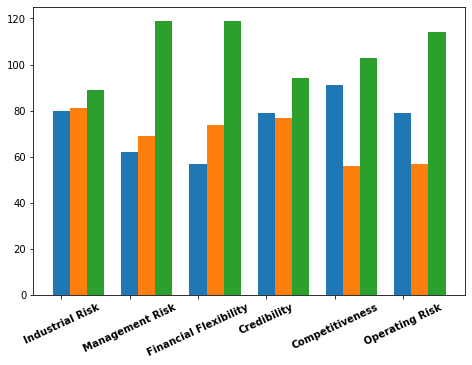

In [ ]:
data = [P,A,N]
X = np.arange(6)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], width = 0.25)
ax.bar(X + 0.25, data[1], width = 0.25)
ax.bar(X + 0.50, data[2], width = 0.25)

y_pos = np.arange(len( d2_x_types[:6]))
plt.xticks(y_pos, d2_x_types[:6], rotation=25, fontweight='bold')
plt.show()


AttributeError: ignored

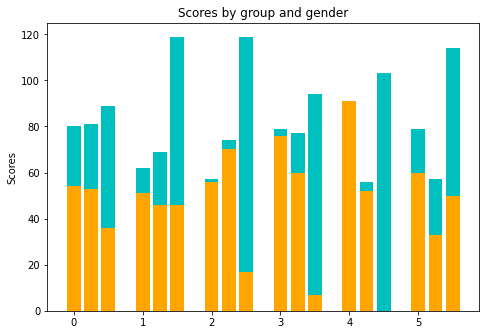

In [ ]:
data = [P,A,N]
B = [P_B, A_B, N_B]
NB = [P_NB, A_NB, N_NB]

N = 6
ind = np.arange(N) # the x locations for the groups
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

p1nb = ax.bar(ind, P_NB, width = 0.2, color='orange')
p1b = ax.bar(ind, P_B, width = 0.2,bottom=P_NB, color='c')

a2nb = ax.bar(ind + 0.25, A_NB, width = 0.2, color='orange')
a2b = ax.bar(ind + 0.25, A_B, width = 0.2,bottom=A_NB, color='c')

n3nb = ax.bar(ind + 0.5, N_NB, width = 0.2, color='orange')
n3b = ax.bar(ind + 0.5, N_B, width = 0.2,bottom=N_NB, color='c')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')

ax.bar_label(p1nb, label_type='center')
ax.bar_label(p1b, label_type='center')
ax.bar_label(a2nb, label_type='center')
ax.bar_label(a2b, label_type='center')
ax.bar_label(n3nb, label_type='center')
ax.bar_label(n3b, label_type='center')
ax.bar_label(p1b, labels=['P' for e in p1b], padding=8, fontsize=12, fontweight='bold')
ax.bar_label(a2b, labels=['A' for e in a2b], padding=8, fontsize=12, fontweight='bold')
ax.bar_label(n3b, labels=['N' for e in n3b], padding=8, fontsize=12, fontweight='bold')

ax.legend(labels=['Non-Bankrupt (NB) ', 'Bankrupt (B)'])
plt.xticks(y_pos, d2_x_types[:6], rotation=25, fontweight='bold')

plt.show()


In [ ]:
def one_hot_encoding(df, categorical_cols):
   return pd.get_dummies(df, columns=categorical_cols, prefix=categorical_cols)

one_hot_encoded_df2 = one_hot_encoding(df2, d2_x_types)

summary = one_hot_encoded_df2.describe()
print(summary)

       Industrial Risk_A  Industrial Risk_N  Industrial Risk_P  \
count         250.000000         250.000000         250.000000   
mean            0.324000           0.356000           0.320000   
std             0.468939           0.479776           0.467412   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             1.000000           1.000000           1.000000   
max             1.000000           1.000000           1.000000   

       Management Risk_A  Management Risk_N  Management Risk_P  \
count         250.000000         250.000000         250.000000   
mean            0.276000           0.476000           0.248000   
std             0.447914           0.500426           0.432718   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%      

### **Task 2 - Implement the models**

You are free to implement these models as you see fit, but you should follow the equations that are presented in
the lecture slides, and you must implement the models from scratch (i.e., you CANNOT use SciKit Learn or any
other pre-existing implementations of these methods). However, you are free to use relevant code given in the course
website.

In particular, your two main tasks in the part are to:
1. Implement analytical linear regression solution for Dataset 1.
2. Implement logistic regression with gradient descent for Dataset 2.
3. Implement mini-batch stochastic gradient descent for both linear and logistic regression.

Regarding the implementation, we recommend the following
approach (but again, you are free to do what you want):

  • Implement both models as Python classes. You should use the constructor for the class to initialize the model
parameters as attributes, as well as to define other important properties of the model.

  • Each of your models classes should have (at least) two functions:
1. Define a fit function, which takes the training data (i.e., X and Y)—as well as other hyperparameters (e.g.,
learning rate and batch size)—as input. This function should train your model by modifying the model parameters.
2. Define a predict function, which takes a set of input points (i.e., X)as input and outputs predictions (i.e.,yˆ) for these points.

In [ ]:
class LinearRegression:
    def __init__(self, add_bias=True, learning_rate=.1, epsilon=1e-4, max_iters=1e5, verbose=True, batch_size=None):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon         #to get the tolerance for the norm of gradients 
        self.max_iters = max_iters     #maximum number of iteration of gradient descent
        self.verbose = verbose
        self.batch_size = batch_size
        self.W = None
        self.cost_list= []
    
    def fit(self, x, y):                        
        N, D = x.shape
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])
            D+=1
        self.W = np.zeros((D,y.shape[1]))

        if self.batch_size == None and self.max_iters == None:  #Analytical
            #alternatively: self.w = np.linalg.inv(x.T @ x)@x.T@y
            self.W = np.linalg.lstsq(x, y)[0]  
        elif self.batch_size == None: #Full batch
            dw = np.inf 
            t = 0
            while np.linalg.norm(dw) > self.epsilon and t < self.max_iters:
                X_batch = x 
                y_batch = y
                y_pred = np.dot(X_batch, self.W) 
                cost = self.cost_func(X_batch, y_batch, y_pred)
                self.cost_list.append(cost)
                dw = self.gradient(X_batch, y_batch, y_pred) 
                self.W -= self.learning_rate * dw
                t += 1

                if self.verbose and (t%(self.max_iters/10)==0):
                    print(f"the cost after {t} iterations is {cost}")
        else: #Minibatch 
            dw = np.inf 
            t = 0

            while np.linalg.norm(dw) > self.epsilon and t < N:
                X_batch = x[t:t+self.batch_size, :]
                y_batch = y[t:t+self.batch_size, :]
                y_pred = np.dot(X_batch, self.W)
                cost = self.cost_func(X_batch, y_batch, y_pred)
                self.cost_list.append(cost)
                dw = self.gradient(X_batch, y_batch, y_pred)
                self.W -= self.learning_rate * dw
                t += self.batch_size
            
            if self.verbose:
                    print(f"the cost after {t} batch iteration is {cost}")


        if self.verbose:
            print(f'the weight found: {self.W}')
    
    def predict(self, x):
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])
        yh = np.dot(x, self.W)                          
        return yh

    def cost_func(self, x, y, y_pred):
        return 1/(2*x.shape[0])*np.sum(np.square(y_pred - y))
    
    def gradient(self, x, y, y_pred):
        return 1/(2*x.shape[0]) * np.dot(x.T, y_pred-y)

    def accuracy(self, y, y_pred):
        correct = np.where(abs(y-y_pred) <= 1, 1, 0).sum().sum()
        acc = correct / y.size
        return acc


class LogisticRegression:
    
    def __init__(self, add_bias=True, learning_rate=.1, epsilon=1e-4, max_iters=1e5, verbose=True, batch_size=None):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon         #to get the tolerance for the norm of gradients 
        self.max_iters = max_iters     #maximum number of iteration of gradient descent
        self.verbose = verbose
        self.batch_size = batch_size
        self.W = None
        self.cost_list= []
        
    def fit(self, x, y):
        N, D = x.shape
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])
            D+=1
        self.W = np.zeros((D,y.shape[1]))

        if self.batch_size == None:
            dw = np.inf 
            t = 0
            while np.linalg.norm(dw) > self.epsilon and t < self.max_iters:
                X_batch = x
                y_batch = y
                y_pred = self.logistic(np.dot(X_batch, self.W))
                cost = self.cost_func(X_batch, y_batch, self.W)
                self.cost_list.append(cost)
                dw = self.gradient(X_batch, y_batch, y_pred)
                self.W -= self.learning_rate * dw
                t += 1

                if self.verbose and (t%(self.max_iters/10)==0):
                    print(f"the cost after {t} iterations is {cost}")
        else:
            dw = np.inf 
            t = 0

            while np.linalg.norm(dw) > self.epsilon and t < N:
                X_batch = x[t:t+self.batch_size, :]
                y_batch = y[t:t+self.batch_size, :]
                y_pred = self.logistic(np.dot(X_batch, self.W))
                cost = self.cost_func(X_batch, y_batch, self.W)
                self.cost_list.append(cost)
                dw = self.gradient(X_batch, y_batch, y_pred)
                self.W -= self.learning_rate * dw
                t += self.batch_size

                if self.verbose:
                    print(f"the cost after {t} iterations is {cost}")

        if self.verbose:
            print(f'the weight found: {self.W}')
    
    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(Nt)]) 
        yh = self.logistic(np.dot(x,self.W)) >= 0.5
        return yh*1
    
    def logistic(self, z):
        return 1./ (1 + np.exp(-z))
    
    def gradient(self, x, y, y_pred):
        N, D = x.shape
        grad = np.dot(x.T, y_pred - y)/N
        return grad
    
    def cost_func(self, x, y, w):
        z = np.dot(x, w)
        J = np.mean(y * np.log1p(np.exp(-z)) + (1-y) * np.log1p(np.exp(z)))
        return J

    def accuracy(self, y, y_pred):
        correct = np.where(y == y_pred,1,0).sum();
        acc = correct / y.size
        return acc


# creating new DF without certain columns
def drop_col(dataset, columns):
  '''
  column example -> ["A", "C"]
  '''
  return dataset.drop(columns, axis=1)

#for corelation
def corr_map(matrix): #vars in the corr
    corr_matrix = matrix.corr()
    sn.heatmap(corr_matrix, annot=True)
    plt.show()

#for line and scatter plots
def scatter_line_graph_2d(scatter_x, scatter_y, line_x, line_y, scatter_color="red", line_color="blue", title="", xlabel="", ylable=""):
    plt.scatter(scatter_x, scatter_y, color=scatter_color)
    plt.plot(line_x, line_y, color=line_color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylable)
    plt.show()

#for 2 scattter plots
def scatter_plot_graph_2d(scatter_x1, scatter_y1, scatter_x2, scatter_y2, scatter_color1="red", scatter_color2="blue", title="", xlabel="", ylable=""):
    plt.scatter(scatter_x1, scatter_y1, color=scatter_color1)
    plt.scatter(scatter_x2, scatter_y2, color=scatter_color2)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylable)
    plt.show()

#for plotting scatter plot with lines 
def scatter_lines_graph_2d(scatter_x, scatter_y, x_vals, weights, scatter_color1="blue", title="", xlabel="", ylable=""):
    plt.scatter(scatter_x, scatter_y, color=scatter_color1)
    for t,w in enumerate(weights):
        plt.plot(x_vals, np.dot(w, x_vals.T), 'r-', alpha=t/len(weights), label=str(t))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylable)
    plt.show()

#functions to split data with randomness
def train_test_split_random(df, num_of_output_col, train_percent, seed=123):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    train_size = int(len(df) * train_percent)
    train_idx = perm[:train_size]
    test_idx = perm[train_size:]

    last_cols = -1*num_of_output_col

    train_x = df.loc[train_idx].iloc[:, :last_cols].values
    train_y = df.loc[train_idx].iloc[:, last_cols:].values
    test_x = df.loc[test_idx].iloc[:, :last_cols].values
    test_y = df.loc[test_idx].iloc[:, last_cols:].values

    return train_x, train_y, test_x, test_y

#functions to split data
def train_test_split(df, num_of_output_col, train_percent):
    last_cols = -1*num_of_output_col
    num_of_rows = int(df.shape[0]*train_percent)+1

    train_x = df.iloc[:num_of_rows, :last_cols].values
    train_y = df.iloc[:num_of_rows, last_cols:].values
    test_x = df.iloc[num_of_rows:, :last_cols].values
    test_y = df.iloc[num_of_rows:, last_cols:].values

    return train_x, train_y, test_x, test_y

### **Task 3 - Run Experiments**

Split each dataset into training and test sets. Use the test set to estimate performance in all of the experiments after training the model with the training set. Evaluate the performance using the corresponding cost function for the classification and regression tasks. You are welcome to perform any experiments and analyses you see fit, but at a minimum you
must complete the following experiments in the order stated below:
1. Report the performance of linear regression and fully batched logistic regression. For both datasets use a 80/20
train/test split and report the performance on both training set and test set.

2. Report the weights of each of features in your trained models and discuss how each feature could affect the
performance of the models.

3. Sample growing subsets of the training data (20%,30%,...80%). Observe and explain how does size of training
data affects the performance for both models. Plot two curves as a function of training size, one for performance
in train and one for test. 

4. For both linear and logistic regression, try out growing minibatch sizes, e.g., 8, 16, 32, 64, and 128. Compare the convergence speed and final performance of different batch sizes to the fully batched baseline. Which
configuration works the best among the ones you tried?

5. Present the performance of both linear and logistic regression with at least three different learning rates (your
own choice).

6. Compare analytical linear regression solution with mini-batch stochastic gradient descent based linear regression solution. What do you find?

Random test split

the cost after 10000 iterations is 40.57963726889691
the cost after 20000 iterations is 37.458354005278174
the cost after 30000 iterations is 37.311665536322074
the cost after 40000 iterations is 37.26347374467102
the cost after 50000 iterations is 37.21863672841479
the cost after 60000 iterations is 37.174006953821845
the cost after 70000 iterations is 37.1294800725363
the cost after 80000 iterations is 37.08505240570202
the cost after 90000 iterations is 37.040723605180354
the cost after 100000 iterations is 36.996493433570166
the weight found: [[ 0.00338099  0.00370878]
 [-0.01721668 -0.01267912]
 [ 0.15021125  0.14515486]
 [-0.08371396 -0.07891699]
 [ 0.03420389  0.03692635]
 [ 0.00809259  0.00950474]
 [ 0.00238207  0.00191216]
 [ 0.01254182  0.01048619]
 [ 0.00222404  0.00244351]]


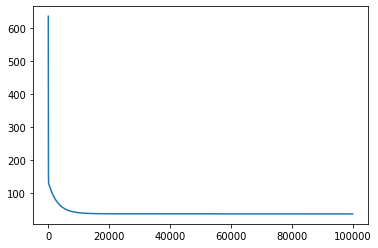

the cost after 10000 iterations is 0.026987775381337807
the cost after 20000 iterations is 0.01604520212914666
the cost after 30000 iterations is 0.011666082841677501
the cost after 40000 iterations is 0.009238395905341798
the cost after 50000 iterations is 0.00767912633729001
the cost after 60000 iterations is 0.006587195255193657
the cost after 70000 iterations is 0.005777264950464357
the cost after 80000 iterations is 0.00515122238812442
the cost after 90000 iterations is 0.00465204414395472
the cost after 100000 iterations is 0.004244232749342014
the weight found: [[-1.31914927  1.31914927]
 [ 0.68119612 -0.68119612]
 [-0.05754167  0.05754167]
 [-0.03305094  0.03305094]
 [ 0.05292082 -0.05292082]
 [-0.71536469  0.71536469]
 [-2.03882018  2.03882018]
 [ 2.574671   -2.574671  ]
 [-1.23134564  1.23134564]
 [-0.5439699   0.5439699 ]
 [ 2.1684739  -2.1684739 ]
 [-2.31999882  2.31999882]
 [-1.52088484  1.52088484]
 [ 5.06840763 -5.06840763]
 [-4.24301761  4.24301761]
 [ 0.62207301 -0.622

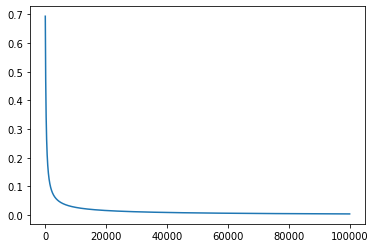

In [ ]:
df1_train_x, df1_train_y, df1_test_x, df1_test_y = train_test_split_random(df,2,0.8)
df2_train_x, df2_train_y, df2_test_x, df2_test_y = train_test_split_random(one_hot_encoded_df2,2,0.8)

LR =  LinearRegression(learning_rate=0.0000001)
LR.fit(df1_train_x,df1_train_y)
plt.plot(np.arange(0,100000), LR.cost_list)
plt.show()


LR = LogisticRegression(learning_rate=0.01)
LR.fit(df2_train_x,df2_train_y)
plt.plot(np.arange(0,100000), LR.cost_list)
plt.show()

**Part 1:** Report the performance of linear regression and fully batched logistic regression. For both datasets use a 80/20 train/test split and report the performance on both training set and test set.


 (Note that this also covers part 2, the weights are printed after fitting)

ANALYTICAL LINEAR REGRESSION - DATASET 1
the weight found: [[-5.80895639e+01 -6.62717393e+01]
 [ 1.10413059e+11  4.07429329e+11]
 [-1.10413059e+11 -4.07429329e+11]
 [-2.20826118e+11 -8.14858658e+11]
 [ 4.02939993e+00  4.22342658e+00]
 [ 5.08208275e-02  1.60203695e-01]
 [ 1.96617350e+01  1.41809299e+01]
 [ 2.01899886e-01  7.06822872e-02]
 [ 7.53664168e+01  9.18647523e+01]]


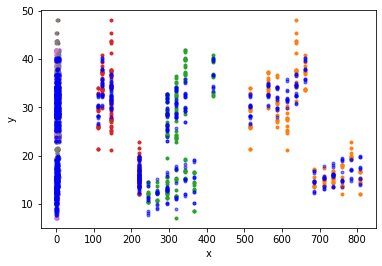

the accuracy is: 38.311688311688314

FULL BATCH LOGISTIC REGRESSION - DATASET 2
the cost after 10000 iterations is 0.0005204917568612543
the cost after 20000 iterations is 0.0002704493682399628
the cost after 30000 iterations is 0.00018377990416378124
the weight found: [[-2.63723254  2.63723254]
 [ 1.15771367 -1.15771367]
 [ 0.3470424  -0.3470424 ]
 [ 0.20189102 -0.20189102]
 [-0.28159813  0.28159813]
 [-1.05276936  1.05276936]
 [-3.70771004  3.70771004]
 [ 4.40713227 -4.40713227]
 [-1.8318987   1.8318987 ]
 [-0.83013097  0.83013097]
 [ 3.62366685 -3.62366685]
 [-3.92601236  3.92601236]
 [-2.62215683  2.62215683]
 [ 9.71781076 -9.71781076]
 [-8.22813041  8.22813041]
 [ 1.89205794 -1.89205794]
 [-1.11614744  1.11614744]
 [-1.90838697  1.90838697]
 [-1.13247647  1.13247647]]


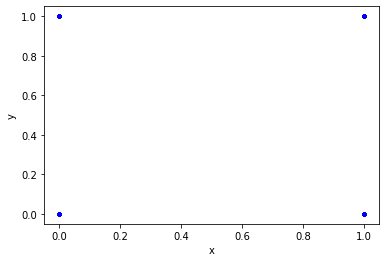

the accuracy is: 100.0


In [ ]:
# Linear Regression - Dataset 1 
print("ANALYTICAL LINEAR REGRESSION - DATASET 1")
LR1 =  LinearRegression(max_iters=None, batch_size=None)
LR1.fit(df1_train_x,df1_train_y) #Fit/train the model
yhLR1 = LR1.predict(df1_test_x); #Now predict the test set
plt.plot(df1_test_x,df1_test_y,'.'); #Plot results
plt.plot(df1_test_x, yhLR1, 'b.', alpha=.5);
plt.xlabel('x');
plt.ylabel('y');
plt.show();
print(f"the accuracy is: {LR1.accuracy(df1_test_y, yhLR1)*100}")

# Full Batch Logistic Regression - Dataset 2
print("\nFULL BATCH LOGISTIC REGRESSION - DATASET 2")
LogR2 =  LogisticRegression(learning_rate=1) 
LogR2.fit(df2_train_x,df2_train_y) #Fit/train the model
yhLogR2 = LogR2.predict(df2_test_x); #Now predict the test set
plt.plot(df2_test_x,df2_test_y,'.'); #Plot results
plt.plot(df2_test_x, yhLogR2, 'b.', alpha=.5);
plt.xlabel('x');
plt.ylabel('y');
plt.show();
print(f"the accuracy is: {LogR2.accuracy(df2_test_y, yhLogR2)*100}")

Not random test split

LINEAR REGRESSION ANALYTICAL - DATASET 1
the weight found: [[-6.37946910e+01 -6.92463510e+01]
 [-3.23523859e+11 -2.07170441e+11]
 [ 3.23523859e+11  2.07170441e+11]
 [ 6.47047717e+11  4.14340883e+11]
 [ 4.23779225e+00  4.41469729e+00]
 [-3.21305990e-02  1.15029454e-01]
 [ 2.20744048e+01  1.60956170e+01]
 [ 2.94948816e-01  8.80177617e-02]
 [ 8.01314571e+01  9.19457913e+01]]


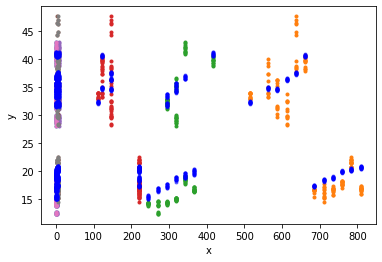

the accuracy is: 24.836601307189543

FULL BATCH LOGISTIC REGRESSION - DATASET 2
the cost after 10000 iterations is 0.0004263220672073613
the cost after 20000 iterations is 0.00022038262321991608
the weight found: [[-2.04253768e+00  2.04253768e+00]
 [ 3.91989142e-01 -3.91989142e-01]
 [ 6.05668639e-03 -6.05668639e-03]
 [-1.58848341e+00  1.58848341e+00]
 [ 5.79714149e-01 -5.79714149e-01]
 [-6.35722597e-01  6.35722597e-01]
 [-3.42616278e+00  3.42616278e+00]
 [ 4.66270559e+00 -4.66270559e+00]
 [-2.88103466e+00  2.88103466e+00]
 [-1.57821951e+00  1.57821951e+00]
 [ 3.33651458e+00 -3.33651458e+00]
 [-3.40278693e+00  3.40278693e+00]
 [-2.04066490e+00  2.04066490e+00]
 [ 8.23534590e+00 -8.23534590e+00]
 [-7.83917285e+00  7.83917285e+00]
 [ 1.22662754e+00 -1.22662754e+00]
 [ 1.10055581e-02 -1.10055581e-02]
 [-2.88212495e+00  2.88212495e+00]
 [-1.64449185e+00  1.64449185e+00]]


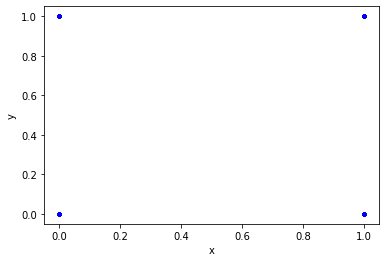

the accuracy is: 97.95918367346938


In [ ]:
df1_train_x, df1_train_y, df1_test_x, df1_test_y = train_test_split(df,2,0.8)
df2_train_x, df2_train_y, df2_test_x, df2_test_y = train_test_split(one_hot_encoded_df2,2,0.8)

# Linear Regression - Dataset 1 drop_col
print("LINEAR REGRESSION ANALYTICAL - DATASET 1")
LR1 =  LinearRegression(max_iters=None, batch_size=None)
LR1.fit(df1_train_x,df1_train_y) #Fit/train the model
yhLR1 = LR1.predict(df1_test_x); #Now predict the test set
plt.plot(df1_test_x,df1_test_y,'.'); #Plot results
plt.plot(df1_test_x, yhLR1, 'b.', alpha=.5);
plt.xlabel('x');
plt.ylabel('y');
plt.show();
print(f"the accuracy is: {LR1.accuracy(df1_test_y, yhLR1)*100}")


# Full Batch Logistic Regression - Dataset 2
print("\nFULL BATCH LOGISTIC REGRESSION - DATASET 2")
LogR2 =  LogisticRegression(learning_rate=1) 
LogR2.fit(df2_train_x,df2_train_y) #Fit/train the model
yhLogR2 = LogR2.predict(df2_test_x); #Now predict the test set
plt.plot(df2_test_x,df2_test_y,'.'); #Plot results
plt.plot(df2_test_x, yhLogR2, 'b.', alpha=.5);
plt.xlabel('x');
plt.ylabel('y');
plt.show();
print(f"the accuracy is: {LogR2.accuracy(df2_test_y, yhLogR2)*100}")

Not random with gradient descent

LINEAR REGRESSION GRADIENT DESCENT - DATASET 1
the cost after 10000 iterations is 36.13236780113167
the cost after 20000 iterations is 34.90584830495059
the cost after 30000 iterations is 33.75806352939292
the cost after 40000 iterations is 32.68365239546338
the cost after 50000 iterations is 31.67763349593732
the cost after 60000 iterations is 30.735377465145397
the cost after 70000 iterations is 29.852581398067812
the cost after 80000 iterations is 29.025245164703744
the cost after 90000 iterations is 28.249649477368855
the cost after 100000 iterations is 27.52233557936733
the weight found: [[ 0.07856965  0.08756657]
 [-0.01719354 -0.0124948 ]
 [ 0.12797169  0.12077808]
 [-0.07258261 -0.06663644]
 [ 0.75201059  0.83011682]
 [ 0.17547579  0.21217652]
 [ 0.06693777  0.05286541]
 [ 0.28375455  0.22992873]
 [ 0.05231581  0.05825467]]


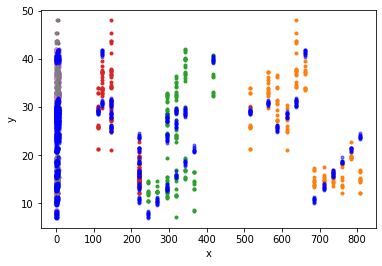

the accuracy is: 16.233766233766232


In [ ]:
print("LINEAR REGRESSION GRADIENT DESCENT - DATASET 1")
LR1 =  LinearRegression(learning_rate=0.000003)
LR1.fit(df1_train_x,df1_train_y) #Fit/train the model
yhLR1 = LR1.predict(df1_test_x); #Now predict the test set
plt.plot(df1_test_x,df1_test_y,'.'); #Plot results
plt.plot(df1_test_x, yhLR1, 'b.', alpha=.5);
plt.xlabel('x');
plt.ylabel('y');
plt.show();
print(f"the accuracy is: {LR1.accuracy(df1_test_y, yhLR1)*100}")


**Part 3:** Sample growing subsets of the training data (20%,30%,...80%). Observe and explain how does size of training
data affects the performance for both models. Plot two curves as a function of training size, one for performance
in train and one for test.



EVALUATING LINEAR REGRESSION ON DATASET 1 WITH 20% TRAINING DATA

EVALUATING LOGISTIC REGRESSION ON DATASET 2 WITH 20% TRAINING DATA

EVALUATING LINEAR REGRESSION ON DATASET 1 WITH 30% TRAINING DATA

EVALUATING LOGISTIC REGRESSION ON DATASET 2 WITH 30% TRAINING DATA

EVALUATING LINEAR REGRESSION ON DATASET 1 WITH 40% TRAINING DATA

EVALUATING LOGISTIC REGRESSION ON DATASET 2 WITH 40% TRAINING DATA

EVALUATING LINEAR REGRESSION ON DATASET 1 WITH 50% TRAINING DATA

EVALUATING LOGISTIC REGRESSION ON DATASET 2 WITH 50% TRAINING DATA

EVALUATING LINEAR REGRESSION ON DATASET 1 WITH 60% TRAINING DATA

EVALUATING LOGISTIC REGRESSION ON DATASET 2 WITH 60% TRAINING DATA

EVALUATING LINEAR REGRESSION ON DATASET 1 WITH 70% TRAINING DATA

EVALUATING LOGISTIC REGRESSION ON DATASET 2 WITH 70% TRAINING DATA

EVALUATING LINEAR REGRESSION ON DATASET 1 WITH 80% TRAINING DATA

EVALUATING LOGISTIC REGRESSION ON DATASET 2 WITH 80% TRAINING DATA

ACCURACY GRAPH TEST VS TRAIN FOR LINEAR REGRESSION:


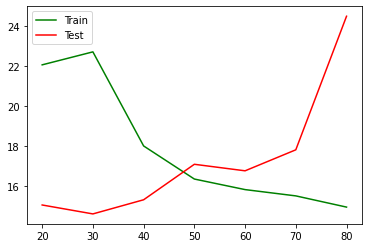


ACCURACY GRAPH TEST VS TRAIN FOR LOGISTIC REGRESSION:


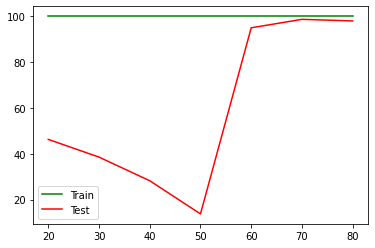

[22.07792207792208, 22.727272727272727, 18.019480519480517, 16.363636363636363, 15.835140997830802, 15.520446096654275, 14.959349593495935]
[15.065146579804562, 14.618249534450653, 15.32608695652174, 17.10182767624021, 16.775244299674267, 17.82608695652174, 24.509803921568626]
[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
[46.231155778894475, 38.50574712643678, 28.187919463087248, 13.709677419354838, 94.94949494949495, 98.64864864864865, 97.95918367346938]


In [ ]:
def evaluate_Linear_Regression(train_x, train_y, test_x, test_y, learn_rate=0.0000003, batchSize=None):
  LR =  LinearRegression(learning_rate=learn_rate, batch_size=batchSize, verbose=False)
  LR.fit(train_x,train_y) #Fit/train the model
  yh = LR.predict(test_x) #Now predict the test set
  # plt.plot(test_x,test_y,'.'); #Plot results
  # plt.plot(test_x, yh, 'b.', alpha=.5);
  # plt.xlabel('x');
  # plt.ylabel('y');
  # plt.show();
  return (LR, yh)

def evaluate_Logistic_Regression(train_x, train_y, test_x, test_y, learn_rate = 0.1, batchSize=None):
  LogR = LogisticRegression(learning_rate=learn_rate, batch_size=batchSize, verbose=False)
  LogR.fit(train_x, train_y)
  yh = LogR.predict(test_x) #Now predict the test set
  # plt.plot(test_x,test_y,'.'); #Plot results
  # plt.plot(test_x, yh, 'b.', alpha=.5);
  # plt.xlabel('x');
  # plt.ylabel('y');
  # plt.show();
  return (LogR, yh)

# this will test batches from 20% to 80% in increments of 10%
sizes_array = [20, 30, 40, 50, 60, 70, 80]
accuracy_LinReg1_test = []
accuracy_LinReg1_train = []
accuracy_LogReg2_test = []
accuracy_LogReg2_train = []
for i in range(0, 7):
  df1_train_x, df1_train_y, df1_test_x, df1_test_y = train_test_split(df,2,0.2 + (i * 0.1))
  df2_train_x, df2_train_y, df2_test_x, df2_test_y = train_test_split(one_hot_encoded_df2,2,0.2 + (i * 0.1))
  percent = sizes_array[i]

  # Linear Regression - Dataset 1
  print("\nEVALUATING LINEAR REGRESSION ON DATASET 1 WITH " + str(percent) + "% TRAINING DATA")
  LinReg1, yhLinReg1 = evaluate_Linear_Regression(df1_train_x, df1_train_y, df1_test_x, df1_test_y, 0.000003, None)
  accuracy_LinReg1_test.append(LinReg1.accuracy(df1_test_y, yhLinReg1) * 100)
  yhLinReg1 = LinReg1.predict(df1_train_x)
  accuracy_LinReg1_train.append(LinReg1.accuracy(df1_train_y, yhLinReg1) * 100)
  
  # Logistic Regression - Dataset 2
  print("\nEVALUATING LOGISTIC REGRESSION ON DATASET 2 WITH " + str(percent) + "% TRAINING DATA")
  LogReg2, yhLogReg2 = evaluate_Logistic_Regression(df2_train_x, df2_train_y, df2_test_x, df2_test_y, 0.1, None)
  accuracy_LogReg2_test.append(LogReg2.accuracy(df2_test_y, yhLogReg2) * 100)
  yhLogReg2 = LogReg2.predict(df2_train_x)
  accuracy_LogReg2_train.append(LogReg2.accuracy(df2_train_y, yhLogReg2) * 100)

print("\nACCURACY GRAPH TEST VS TRAIN FOR LINEAR REGRESSION:")
plt.plot(sizes_array, accuracy_LinReg1_train, 'g-', label="Train")
plt.plot(sizes_array, accuracy_LinReg1_test, 'r-', label="Test")
plt.legend()
plt.show()
print("\nACCURACY GRAPH TEST VS TRAIN FOR LOGISTIC REGRESSION:")
plt.plot(sizes_array, accuracy_LogReg2_train, 'g-', label="Train")
plt.plot(sizes_array, accuracy_LogReg2_test, 'r-', label="Test")
plt.legend()
plt.show()

print(accuracy_LinReg1_train)
print(accuracy_LinReg1_test)
print(accuracy_LogReg2_train)
print(accuracy_LogReg2_test)


**Part 4:** For both linear and logistic regression, try out growing minibatch sizes, e.g., 8, 16, 32, 64, and 128. Compare the convergence speed and final performance of different batch sizes to the fully batched baseline.


EVALUATING LINEAR REGRESSION ON DATASET 1 WITH BATCH SIZE 10
the cost after 620 batch iteration is 12.147134424573045
the weight found: [[ 1.58933599e-04  1.67697193e-04]
 [ 5.56440813e-03  8.88581997e-03]
 [ 4.99764300e-02  4.96793986e-02]
 [-2.22060110e-02 -2.03967893e-02]
 [ 2.10164270e-03  2.13944210e-03]
 [ 3.65374174e-04  4.10489805e-04]
 [ 1.80777469e-05  1.83793369e-05]
 [ 2.08519866e-04  2.15504585e-04]
 [ 1.03504122e-04  1.11766616e-04]]

EVALUATING LOGISTIC REGRESSION ON DATASET 2 WITH BATCH SIZE 10
the cost after 10 iterations is 0.6931471805599453
the cost after 20 iterations is 0.6131889170615862
the cost after 30 iterations is 0.5453927039256709
the cost after 40 iterations is 0.4790323899766037
the cost after 50 iterations is 0.4369684902522028
the cost after 60 iterations is 0.3983286708134142
the cost after 70 iterations is 0.37216138012006794
the cost after 80 iterations is 0.33405818479686233
the cost after 90 iterations is 0.3130070722277828
the cost after 100 ite

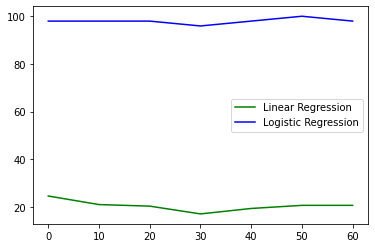

[24.509803921568626, 20.915032679738562, 20.26143790849673, 16.99346405228758, 19.28104575163399, 20.588235294117645, 20.588235294117645]
[97.95918367346938, 97.95918367346938, 97.95918367346938, 95.91836734693877, 97.95918367346938, 100.0, 97.95918367346938]


In [ ]:
df1_train_x, df1_train_y, df1_test_x, df1_test_y = train_test_split(df,2,0.8)
df2_train_x, df2_train_y, df2_test_x, df2_test_y = train_test_split(one_hot_encoded_df2,2,0.8)

#Also need to compare to fully batched baselines from part 1, yhLR1, yhLogR1, yhLR2 and yhLogR2 so insert them here
sizes_array = [i for i in range(0,61,10)] # 0 means full batch
accuracy_LinReg1 = [accuracy_LinReg1_test[-1]]
accuracy_LogReg2 = [accuracy_LogReg2_test[-1]]

#This loop will run everything with batches of 8, 16, 32, 64 and 128
for i in range(1, len(sizes_array)):
  batchSize = sizes_array[i]
  # Linear Regression - Dataset 1
  print("\nEVALUATING LINEAR REGRESSION ON DATASET 1 WITH BATCH SIZE " + str(batchSize))
  LinReg1, yhLinReg1 = evaluate_Linear_Regression(df1_train_x, df1_train_y, df1_test_x, df1_test_y, 0.000003, batchSize)
  accuracy_LinReg1.append(LinReg1.accuracy(df1_test_y, yhLinReg1) * 100) 

  # Fully Batched Logistic Regression - Dataset 2
  print("\nEVALUATING LOGISTIC REGRESSION ON DATASET 2 WITH BATCH SIZE " + str(batchSize))
  LogReg2, yhLogReg2 = evaluate_Logistic_Regression(df2_train_x, df2_train_y, df2_test_x, df2_test_y, 0.1, batchSize)
  accuracy_LogReg2.append(LogReg2.accuracy(df2_test_y, yhLogReg2) * 100)

print("\nACCURACY GRAPH FOR BATCH SIZES:")
plt.plot(sizes_array, accuracy_LinReg1, 'g-', label="Linear Regression")
plt.plot(sizes_array, accuracy_LogReg2, 'b-', label="Logistic Regression")
plt.legend()
plt.show()

print(accuracy_LinReg1)
print(accuracy_LogReg2)

**Part 5:** Present the performance of both linear and logistic regression with at least three different learning rates (your
own choice).


In [ ]:
df1_train_x, df1_train_y, df1_test_x, df1_test_y = train_test_split(df,2,0.8)
df2_train_x, df2_train_y, df2_test_x, df2_test_y = train_test_split(one_hot_encoded_df2,2,0.8)
LinReg_acc_arr = []
LogReg_acc_arr = []

print("\nEVALUATING LINEAR REGRESSION ON DATASET 1 WITH LEARNING RATE of 0.000001"); 
LinReg, yhLinReg = evaluate_Linear_Regression(df1_train_x, df1_train_y, df1_test_x, df1_test_y, 0.000001, None);
LinReg_acc_arr.append(LinReg.accuracy(df1_test_y, yhLinReg) * 100)

print("\nEVALUATING LINEAR REGRESSION ON DATASET 1 WITH LEARNING RATE of 0.000002"); 
LinReg, yhLinReg = evaluate_Linear_Regression(df1_train_x, df1_train_y, df1_test_x, df1_test_y, 0.000002, None);
LinReg_acc_arr.append(LinReg.accuracy(df1_test_y, yhLinReg) * 100)

print("\nEVALUATING LINEAR REGRESSION ON DATASET 1 WITH LEARNING RATE of 0.000003"); 
LinReg, yhLinReg = evaluate_Linear_Regression(df1_train_x, df1_train_y, df1_test_x, df1_test_y, 0.000003, None);
LinReg_acc_arr.append(LinReg.accuracy(df1_test_y, yhLinReg) * 100)

print("\nEVALUATING LOGISTIC REGRESSION ON DATASET 2 WITH LEARNING RATE of 0.01");
LogReg, yhLogReg = evaluate_Logistic_Regression(df2_train_x, df2_train_y, df2_test_x, df2_test_y, 0.01, None);
LogReg_acc_arr.append(LogReg.accuracy(df2_test_y, yhLogReg) * 100)

print("\nEVALUATING LOGISTIC REGRESSION ON DATASET 2 WITH LEARNING RATE of 0.1");
LogReg, yhLogReg = evaluate_Logistic_Regression(df2_train_x, df2_train_y, df2_test_x, df2_test_y, 0.1, None);
LogReg_acc_arr.append(LogReg.accuracy(df2_test_y, yhLogReg) * 100)

print("\nEVALUATING LOGISTIC REGRESSION ON DATASET 2 WITH LEARNING RATE of 1");
LogReg, yhLogReg = evaluate_Logistic_Regression(df2_train_x, df2_train_y, df2_test_x, df2_test_y, 1, None);
LogReg_acc_arr.append(LogReg.accuracy(df2_test_y, yhLogReg) * 100)

print(LinReg_acc_arr)
print(LogReg_acc_arr)

**Part 6:** Compare analytical linear regression solution with mini-batch stochastic gradient descent based linear regression solution. What do you find?
compared with the above data.

k-Nearest Neighbors

In [ ]:
class KNN:

  def __init__(self, K, X_train, Y_train) -> None:
    self.K = K
    self.X_train = X_train
    self.Y_train = Y_train

  def distance(self, x1, x2): # for classification
    return x1.size - np.sum((x1 == x2)*1)

  def predict_val(self, data_point): # helper function
    predictions = []
    for i in range(self.X_train.shape[0]):
      predictions.append((self.distance(self.X_train[i,:], data_point), self.Y_train[i, :][0]))

    predictions.sort()

    predictions_hm = {}

    for val in predictions[:self.K]:
      dist, res = val
      if res not in predictions_hm:
        predictions_hm[res] = 0
      predictions_hm[res] += 1

    best_prediction = None
    num_of_occ = 0
    for key in predictions_hm:
      if predictions_hm[key] > num_of_occ:
        num_of_occ = predictions_hm[key]
        best_prediction = key
    
    return best_prediction


  def predict(self, X_test):
    classification = []

    for data_point in X_test:
      classification.append(self.predict_val(data_point))

    return pd.DataFrame(classification)
  
  def accuracy(self, y, pred_y):
    return (y == pred_y).sum().sum()*1 / y.shape[0]

In [ ]:
df2_train_x, df2_train_y, df2_test_x, df2_test_y = train_test_split(df2,1,0.8)
knn = KNN(5,df2_train_x, df2_train_y)
y_pred = knn.predict(df2_test_x)
print(knn.accuracy(df2_test_y, y_pred)*100)

In [ ]:
from sklearn.linear_model import LinearRegression
trainx, trainy, testx, testy = train_test_split(df, 2, 0.8)

reg = LinearRegression()
reg.fit(trainx,trainy)
yh = reg.predict(testx)
print(f"accuracy = {(np.where(abs(testy-yh) <= 1, 1, 0).sum().sum()/testy.size)*100}")